In [1]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.datasets import mnist
from keras.callbacks import History
history = History()
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Model

In [2]:
input_img = Input(shape=(784,))


encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)

encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)


decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

In [3]:
autoencoder.compile(optimizer='adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               1011

# Load mnist Dataset

In [4]:
(x_train, _),(x_test,_) = mnist.load_data()

In [5]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
np.prod(x_train.shape[1:])

784

In [8]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = x_train.reshape((len(x_train), (np.prod(x_train.shape[1:]))))
x_test = x_test.reshape((len(x_test), (np.prod(x_test.shape[1:]))))
print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')


x_train shape = (60000, 784)
x_test shape = (10000, 784)


# Fit Data

In [9]:
history = autoencoder.fit(x_train, x_train, epochs=100, batch_size = 256, shuffle = True,
              validation_data = (x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.3386 - accuracy: 0.7500 - val_loss: 0.2648 - val_accuracy: 0.7917
Epoch 2/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.2592 - accuracy: 0.7949 - val_loss: 0.2547 - val_accuracy: 0.7891
Epoch 3/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.2472 - accuracy: 0.7975 - val_loss: 0.2364 - val_accuracy: 0.7929
Epoch 4/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.2293 - accuracy: 0.7941 - val_loss: 0.2233 - val_accuracy: 0.7939
Epoch 5/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.2173 - accuracy: 0.7948 - val_loss: 0.2061 - val_accuracy: 0.7965
Epoch 6/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.1997 - accuracy: 0.7969 - val_loss: 0.1912 - val_accuracy: 0.7989
Epoch 7/100
60000/60000 [==============================] - 4s 

60000/60000 [==============================] - 7s 122us/step - loss: 0.1119 - accuracy: 0.8116 - val_loss: 0.1108 - val_accuracy: 0.8102
Epoch 56/100
60000/60000 [==============================] - 6s 105us/step - loss: 0.1117 - accuracy: 0.8116 - val_loss: 0.1105 - val_accuracy: 0.8101
Epoch 57/100
60000/60000 [==============================] - 7s 110us/step - loss: 0.1113 - accuracy: 0.8117 - val_loss: 0.1124 - val_accuracy: 0.8096
Epoch 58/100
60000/60000 [==============================] - 7s 111us/step - loss: 0.1109 - accuracy: 0.8117 - val_loss: 0.1086 - val_accuracy: 0.8115
Epoch 59/100
60000/60000 [==============================] - 7s 113us/step - loss: 0.1106 - accuracy: 0.8118 - val_loss: 0.1097 - val_accuracy: 0.8106
Epoch 60/100
60000/60000 [==============================] - 7s 114us/step - loss: 0.1103 - accuracy: 0.8118 - val_loss: 0.1098 - val_accuracy: 0.8112
Epoch 61/100
60000/60000 [==============================] - 7s 114us/step - loss: 0.1100 - accuracy: 0.8118 - val

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


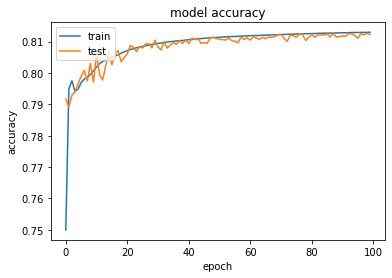

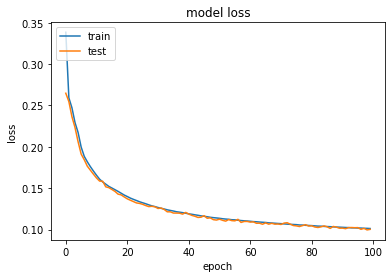

In [13]:
# Plot training loss and validation split loss over the epochs
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('deepAE_model_accuracy.png')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('deepAE_model_loss.png')
plt.show()

In [11]:
recons_imgs = autoencoder.predict(x_test)

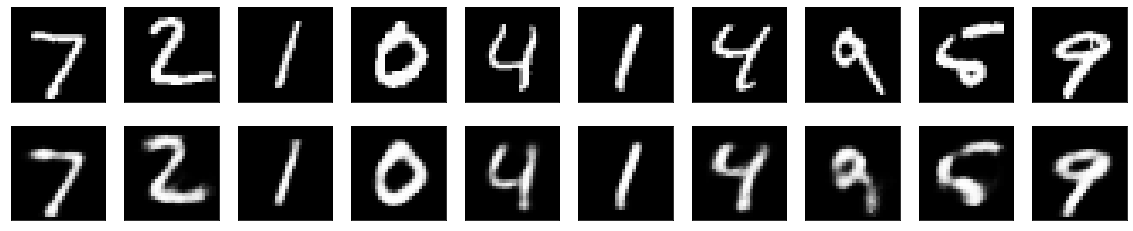

In [12]:
n = 10
plt.figure(figsize =(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2,n, i+1+n)
    plt.imshow(recons_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()